# Publishing rate raw data visualizations

[The Research Productivity of New PhDs in Economics: The Surprisingly High Non-success of the Successful](https://www.aeaweb.org/articles?id=10.1257/jep.28.3.205)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patch
import seaborn as sns

from mayavi import mlab
from mayavi.api import Engine
%gui qt

In [2]:
quantiled_by_year_rank = pd.read_csv("raw_data/rank_year_agg.csv")
mean_aer_quantiles = pd.read_csv("raw_data/rank_agg.csv")
mock_data = pd.read_csv("fake_data/mock_data.csv")

## Visualize

Let's visualize the data first to get an idea of what we're modelling.

TODO

*   Finish kdeplot of all 31 individual schools
*   Add a master line showing the mean of all schools
*   3d plot showing each school?
*   Top 3 schools, UBC, Toronto, 31+

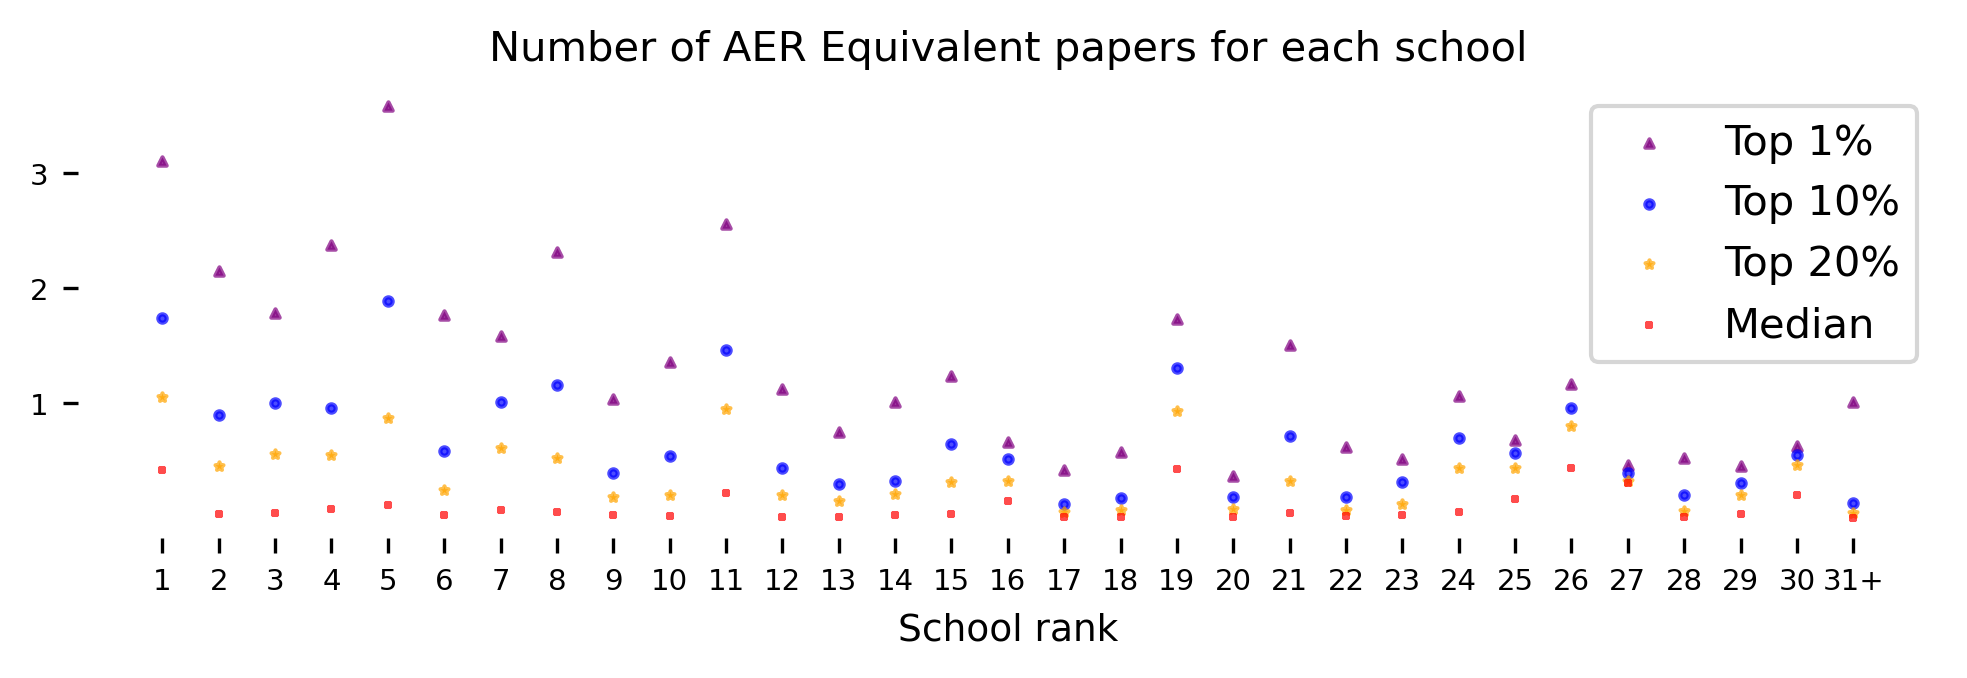

In [3]:
fig, ax = plt.subplots(figsize=(8,2))
fig.set_dpi(300)

xtick_names = [str(integer) for integer in range(1,31)]
xtick_names.append('31+')

ax.scatter(mean_aer_quantiles["Rank"], mean_aer_quantiles["99th"], marker='^', color="purple", alpha=0.7, label="Top 1%", s=4);
ax.scatter(mean_aer_quantiles["Rank"], mean_aer_quantiles["90th"], marker='o', color="blue", alpha=0.7, label="Top 10%", s=4);
ax.scatter(mean_aer_quantiles["Rank"], mean_aer_quantiles["80th"], marker='*', color="orange", alpha=0.7, label="Top 20%", s=4);
ax.scatter(mean_aer_quantiles["Rank"], mean_aer_quantiles["50th"], marker='+', color="red", alpha=0.7, label="Median", s=4);
ax.set_title("Number of AER Equivalent papers for each school", fontsize=10)
ax.set_xticks(range(1,32))
ax.set_xticklabels(xtick_names, fontsize=7)
ax.set_xlabel("School rank", fontsize=9)
ax.set_yticks([1,2,3])
ax.set_yticklabels(["1", "2", "3"], fontsize=7)


ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.legend();

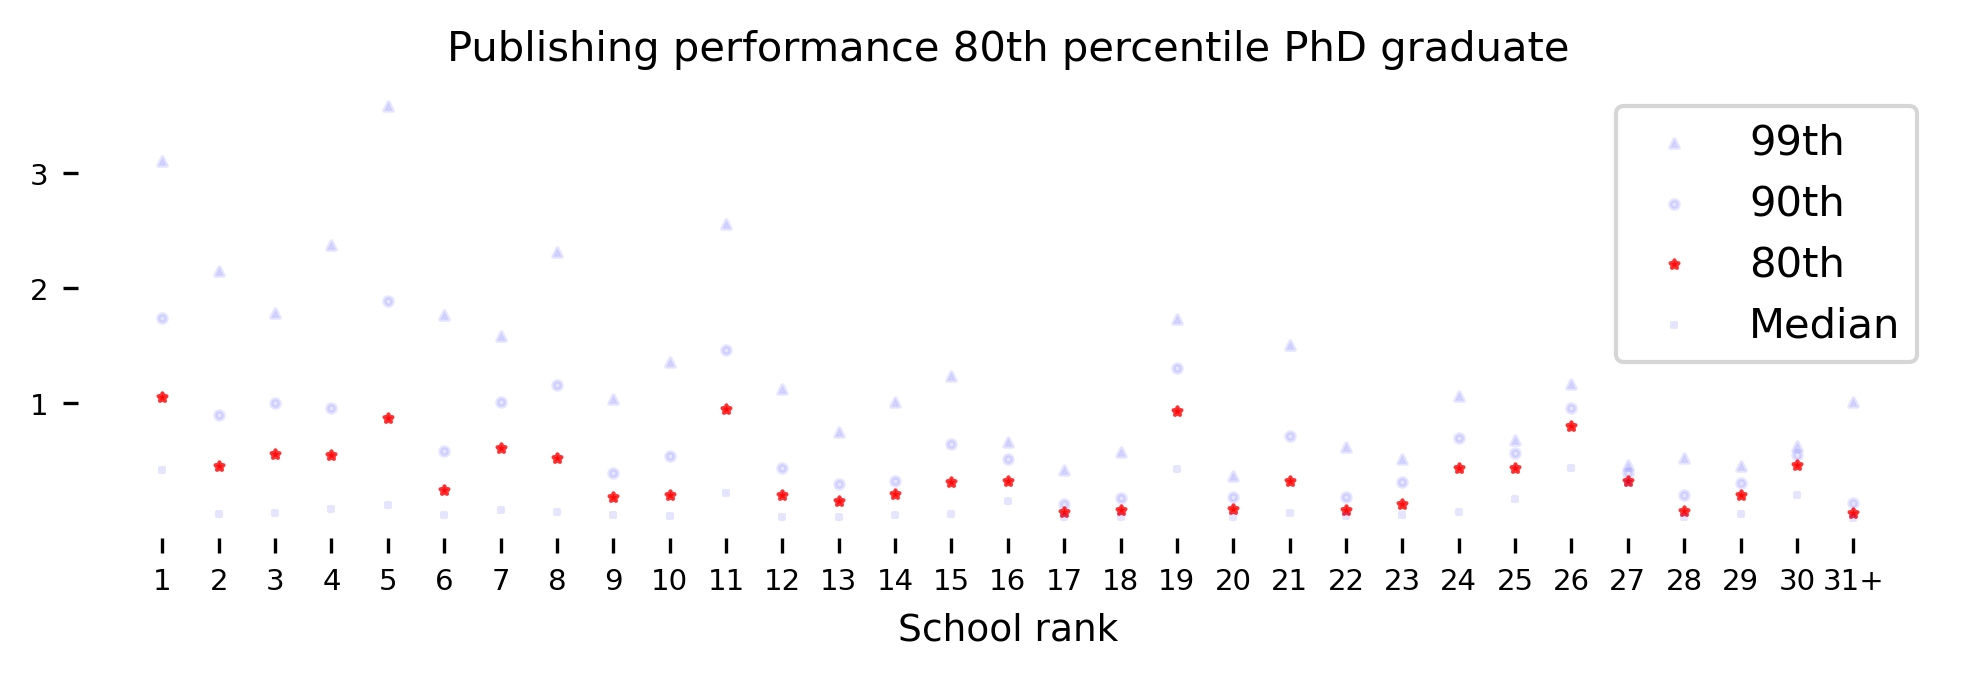

In [4]:
fig, ax = plt.subplots(figsize=(8,2))
fig.set_dpi(300)

xtick_names = [str(integer) for integer in range(1,31)]
xtick_names.append('31+')

ax.scatter(mean_aer_quantiles["Rank"], mean_aer_quantiles["99th"], marker='^', color="blue", alpha=0.1, label="99th", s=4);
ax.scatter(mean_aer_quantiles["Rank"], mean_aer_quantiles["90th"], marker='o', color="blue", alpha=0.1, label="90th", s=4);
ax.scatter(mean_aer_quantiles["Rank"], mean_aer_quantiles["80th"], marker='*', color="red", alpha=0.8, label="80th", s=4);
ax.scatter(mean_aer_quantiles["Rank"], mean_aer_quantiles["50th"], marker='+', color="blue", alpha=0.1, label="Median", s=4);
ax.set_title("Publishing performance 80th percentile PhD graduate", fontsize=10)
ax.set_xticks(range(1,32))
ax.set_xticklabels(xtick_names, fontsize=7)
ax.set_xlabel("School rank", fontsize=9)
ax.set_yticks([1,2,3])
ax.set_yticklabels(["1", "2", "3"], fontsize=7)

ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)


ax.legend();

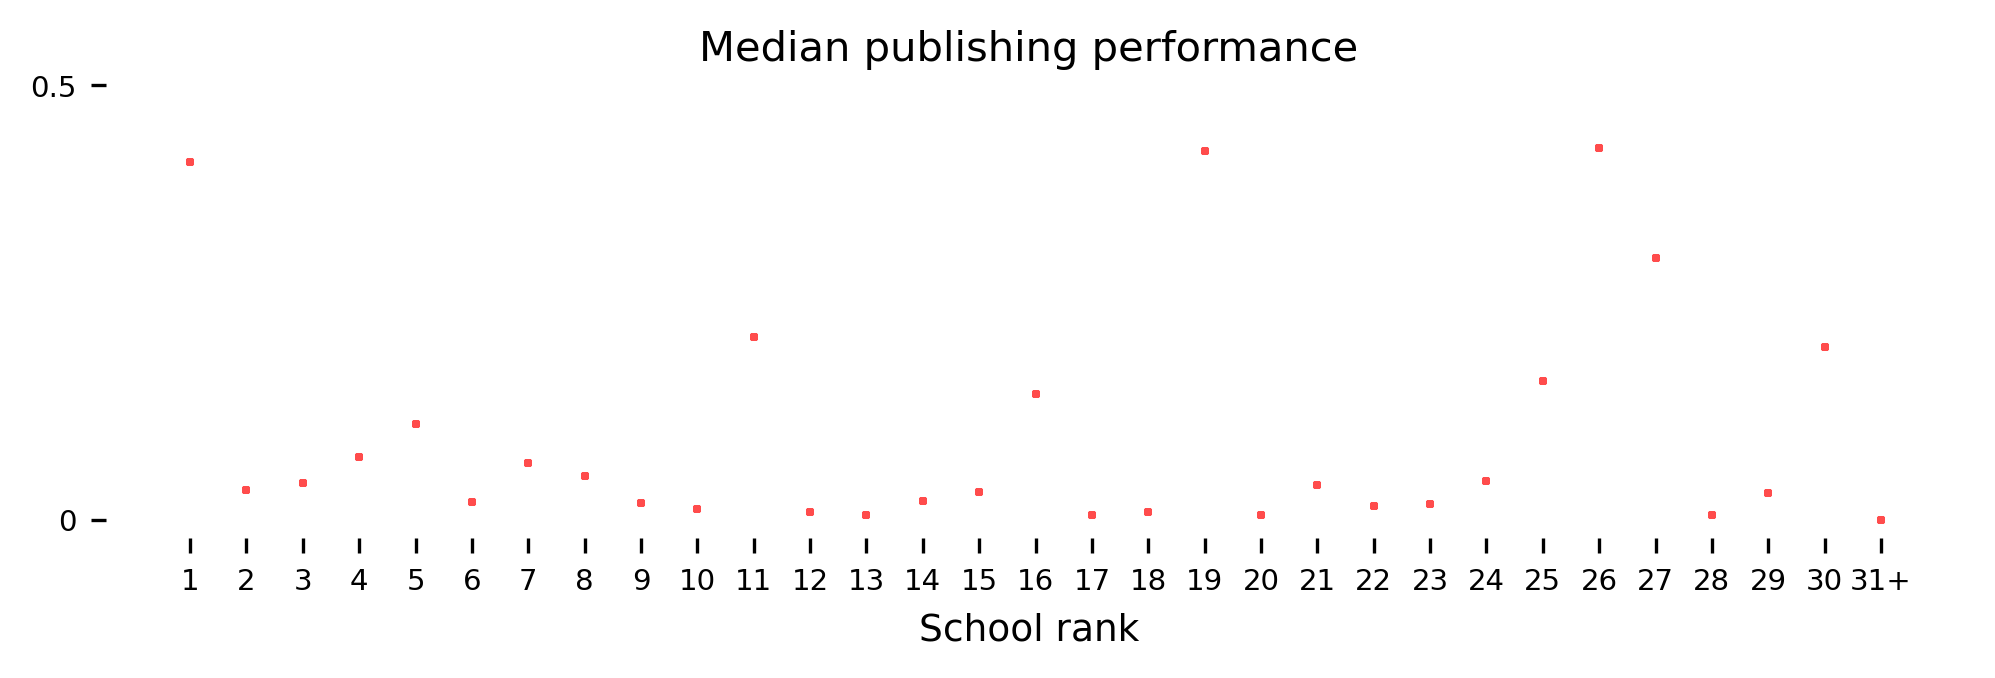

In [5]:
fig, ax = plt.subplots(figsize=(8,2))
fig.set_dpi(300)

xtick_names = [str(integer) for integer in range(1,31)]
xtick_names.append('31+')

ax.scatter(mean_aer_quantiles["Rank"], mean_aer_quantiles["50th"], marker='+', color="red", alpha=0.7, label="Median", s=4);
ax.set_title("Median publishing performance ", fontsize=10)
ax.set_xticks(range(1,32))
ax.set_xticklabels(xtick_names, fontsize=7)
ax.set_xlabel("School rank ", fontsize=9)
ax.set_yticks([0,.5])
ax.set_yticklabels(["0", "0.5"], fontsize=7)

ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)

### Random order?
Try randomizing the order to avoid the bias of school rank.

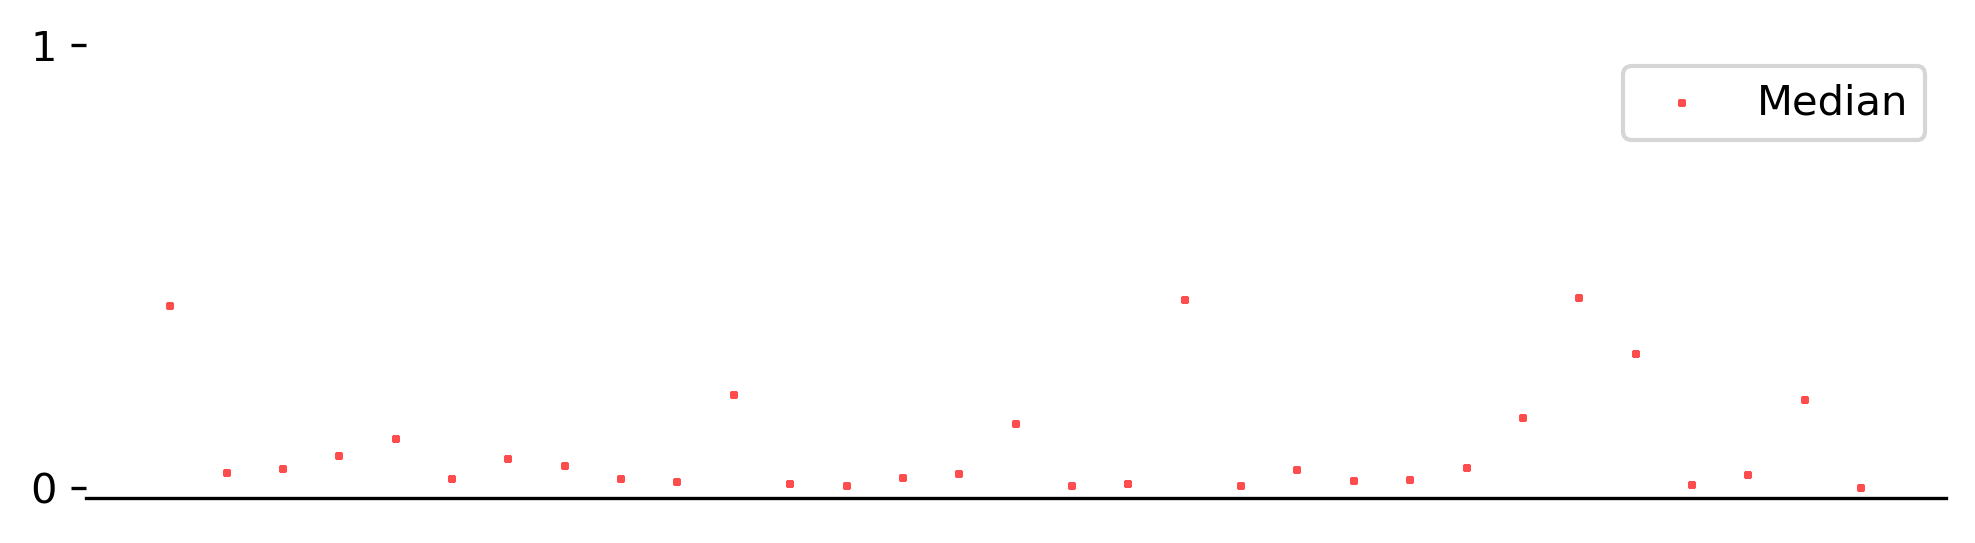

In [11]:
fig, ax = plt.subplots(figsize=(8,2))
fig.set_dpi(300)

new_order = mean_aer_quantiles.index.values
np.random.shuffle(new_order)
shuffled_quantiles = mean_aer_quantiles.copy()
shuffled_quantiles.reindex(new_order)

# ax.scatter(mean_aer_quantiles["Rank"], mean_aer_quantiles["99th"], marker='^', color="purple", alpha=0.7, label="99th", s=4);
# ax.scatter(mean_aer_quantiles["Rank"], mean_aer_quantiles["90th"], marker='o', color="blue", alpha=0.7, label="90th", s=4);
# ax.scatter(mean_aer_quantiles["Rank"], mean_aer_quantiles["80th"], marker='*', color="orange", alpha=0.7, label="80th", s=4);
ax.scatter(mean_aer_quantiles["Rank"], mean_aer_quantiles["50th"], marker='+', color="red", alpha=0.7, label="Median", s=4);
# ax.set_xticks(range(1,32))
# ax.set_xticklabels(xtick_names, fontsize=7)
# ax.set_xlabel("School rank (lower is better - maybe?)", fontsize=10)
ax.set_yticks([0,1])
ax.set_xticklabels([])
ax.set_xticks([])

ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(True)

ax.legend();

# 3D Plotting

In [3]:
mock_data.head()

,PhD_ID,Rank,Year,AERPub,AERPub_school_help,AERPub_choose_best
0,2299,1,1997,0.861483,2.361483,2.033414
1,9037,1,1986,0.077802,1.577802,2.032816
2,9210,1,1989,1.320763,2.820763,2.016770
3,7350,1,1991,0.121159,1.621159,1.915269
4,4101,1,1991,1.304294,2.804294,1.900224


In [4]:
x,y = np.mgrid[1:90:30j,0:90:10j]
z = np.zeros((30,10))
for rank in range(1,31):
    hist, bins = np.histogram(mock_data[mock_data.Rank == rank].AERPub.values, bins=10, range=(0,3))
    z[rank-1,:] = hist


In [28]:
x,y = np.mgrid[1:90:30j,0:90:10j]
z = np.zeros((30,10))
for rank in range(1,31):
    hist, bins = np.histogram(mock_data[mock_data.Rank == rank].AERPub.values, bins=10, range=(0,3))
    z[rank-1,:] = hist

mock_fig = mlab.figure("Mock", bgcolor=(1.0, 1.0, 1.0), fgcolor=(.44, .44, .44))
mlab.clf(mock_fig)
bar = mlab.barchart(x,y,z, figure = mock_fig);

# Change bar heights
bar.module_manager.scalar_lut_manager.lut_mode = "YlGnBu"
bar.glyph.glyph_source.glyph_source.x_length = 2.7
bar.glyph.glyph_source.glyph_source.y_length = 10.0

colorbar = mlab.colorbar(orientation="vertical", nb_labels=5, label_fmt="%.0f")

# Position 1 is the placement. np.array(x,y) in coords [0,1]
# Position 2 is the height and width(width, height) in coords [0,1]
colorbar.scalar_bar_representation.position = np.array([0.8,0.2])
colorbar.scalar_bar_representation.position2 = np.array([0.05,0.55])

# Plot text
title = mlab.text(.1, .85, "Students choosing schools at random", figure=mock_fig, name="Title text")
title.width=0.8
# Could also set property.justification, property.font_family

xlabel = mlab.text(0.52, 0.025, "Schools by rank", figure=mock_fig, name="xlabel")
ylabel = mlab.text(0.08, 0, "AER Equiv. Papers", figure=mock_fig, name="ylabel")
z_label = mlab.text(0.01,0.45, "Graduates", figure=mock_fig, name="zlabel")

x_low_lim = mlab.text(0.4, 0.015, "30", figure=mock_fig, name="x lower")
x_up_lim = mlab.text(0.88, 0.1, "1", figure=mock_fig,name="x upper")

y_low_lim = mlab.text(0.15, 0.14, "0", figure=mock_fig, name="y lower")
y_up_lim = mlab.text(0.25, 0.07, "1.5", figure=mock_fig,name="y upper")

xlabel.property.orientation = 8
ylabel.property.orientation = 334
y_low_lim.property.orientation = 334
y_up_lim.property.orientation = 334

z_label.width = 0.15
xlabel.width=0.3
ylabel.width=0.25
x_low_lim.width=0.03
x_up_lim.width=0.015
y_low_lim.width=0.02
y_up_lim.width=0.04

# for xi in range(0,10,1):
#     for yi in range(0,10,1):
#         text = str(xi) + "," + str(yi)
#         mlab.text(xi/10,yi/10,text, figure = mock_fig, width=0.025,  opacity=0.7)

# Position the camera
mlab.view(azimuth=60, elevation=90, distance=300, figure=mock_fig);

In [24]:
mlab.clf?

In [17]:
# mlab.gcf
# mlab.savefig("heehaw.png")
#mlab.axes
#mlab.outline
#mlab# title, xlabel, ylabel

#mlab colorbar scalarbar vectorbar Show the gradient corresponding to values
# -> mlab.figures for multiple figs

#mlab.show() if not in a notebook

# Camera
# view, roll, yaw, move


# # Change width to 0.6
# text.actor.minimum_size = array([10, 10])
# text.actor.position = array([0.  , 0.85])
# text.actor.position2 = array([0.6614, 1.    ])
# text.actor.width = 0.6614
# text.width = 0.6614

# # Move X to .15
# text.actor.minimum_size = array([10, 10])
# text.actor.position = array([0.15, 0.85])
# text.actor.position2 = array([0.6614, 1.    ])
# text.actor.position = array([0.15, 0.85])
# text.x_position = 0.15

# # Font family
# text.property.font_family = 'times'

# # Centered
# text.property.justification = 'centered'

# # Font size
# text.property.font_size=16
mock_data.head()

,PhD_ID,Rank,Year,AERPub,AERPub_school_help,AERPub_choose_best
0,2299,1,1997,0.861483,2.361483,2.033414
1,9037,1,1986,0.077802,1.577802,2.032816
2,9210,1,1989,1.320763,2.820763,2.016770
3,7350,1,1991,0.121159,1.621159,1.915269
4,4101,1,1991,1.304294,2.804294,1.900224


In [20]:
x,y = np.mgrid[1:90:30j,0:90:10j]
z = np.zeros((30,10))
for rank in range(1,31):
    hist, bins = np.histogram(mock_data[mock_data.Rank == rank].AERPub_school_help.values, bins=10, range=(0,3))
    z[rank-1,:] = hist

In [33]:
x,y = np.mgrid[1:90:30j,0:90:10j]
z = np.zeros((30,10))
for rank in range(1,31):
    hist, bins = np.histogram(mock_data[mock_data.Rank == rank].AERPub_school_help.values, bins=10, range=(0,3))
    z[rank-1,:] = hist

school_help_fig = mlab.figure("School help", bgcolor=(1.0, 1.0, 1.0), fgcolor=(.44, .44, .44))
mlab.clf(school_help_fig)
bar = mlab.barchart(x,y,z, figure = school_help_fig);

# Change bar heights
bar.module_manager.scalar_lut_manager.lut_mode = "YlGnBu"
bar.glyph.glyph_source.glyph_source.x_length = 2.7
bar.glyph.glyph_source.glyph_source.y_length = 10.0

colorbar = mlab.colorbar(orientation="vertical", nb_labels=5, label_fmt="%.0f")

# Position 1 is the placement. np.array(x,y) in coords [0,1]
# Position 2 is the height and width(width, height) in coords [0,1]
colorbar.scalar_bar_representation.position = np.array([0.8,0.2])
colorbar.scalar_bar_representation.position2 = np.array([0.05,0.55])

# Plot text
title = mlab.text(.1, .85, "Schools help publishing", figure=school_help_fig, name="Title text")
title.width=0.8
# Could also set property.justification, property.font_family

xlabel = mlab.text(0.52, 0.025, "Schools by rank", figure=school_help_fig, name="xlabel")
ylabel = mlab.text(0.08, 0, "AER Equiv. Papers", figure=school_help_fig, name="ylabel")
z_label = mlab.text(0.01,0.45, "Graduates", figure=school_help_fig, name="zlabel")

x_low_lim = mlab.text(0.4, 0.015, "30", figure=school_help_fig, name="x lower")
x_up_lim = mlab.text(0.88, 0.1, "1", figure=school_help_fig,name="x upper")

y_low_lim = mlab.text(0.15, 0.14, "0", figure=school_help_fig, name="y lower")
y_up_lim = mlab.text(0.25, 0.07, "1.5", figure=school_help_fig,name="y upper")

xlabel.property.orientation = 8
ylabel.property.orientation = 334
y_low_lim.property.orientation = 334
y_up_lim.property.orientation = 334

z_label.width = 0.15
xlabel.width=0.3
ylabel.width=0.25
x_low_lim.width=0.03
x_up_lim.width=0.015
y_low_lim.width=0.02
y_up_lim.width=0.04

# for xi in range(0,10,1):
#     for yi in range(0,10,1):
#         text = str(xi) + "," + str(yi)
#         mlab.text(xi/10,yi/10,text, figure = mock_fig, width=0.025,  opacity=0.7)

# Position the camera
mlab.view(azimuth=60, elevation=90, distance=300, figure=school_help_fig);